<a href="https://colab.research.google.com/github/st064560/my_python/blob/master/pandas_visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# импортируем библиотеки numpy и pandas
import numpy as np
import pandas as pd

# импортируем библиотеку datetime для работы с датами
import datetime
from datetime import datetime, date

# импортируем библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt

In [2]:
# генерируем временной ряд на
# основе случайного блуждания
s = pd.Series(np.random.randn(1096),
              index=pd.date_range('2012-01-01', 
                                  '2014-12-31'))
s

2012-01-01    0.602621
2012-01-02   -1.028155
2012-01-03    0.799073
2012-01-04   -0.429797
2012-01-05   -1.776572
                ...   
2014-12-27    0.584903
2014-12-28    1.041624
2014-12-29    0.474422
2014-12-30   -1.148288
2014-12-31   -1.673540
Freq: D, Length: 1096, dtype: float64

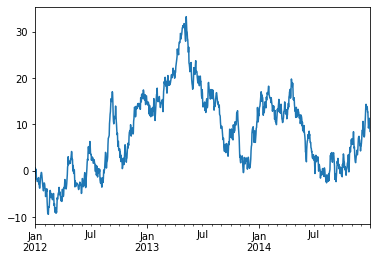

In [4]:
walk_ts = s.cumsum()
# эта строка визуализирует случайное блуждание - так просто :)
walk_ts.plot();

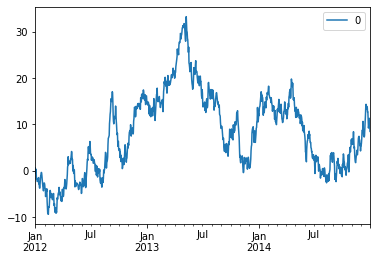

In [5]:
walk_df = pd.DataFrame(walk_ts)
walk_df.plot();

In [6]:
# сгенерируем два случайных блуждания, которые станут двумя столбцами объекта DataFrame:
df = pd.DataFrame(np.random.randn(1096, 2), 
                  index=walk_ts.index, columns=list('AB'))
walk_df = df.cumsum()
walk_df.head()

,A,B
2012-01-01,-1.243374,-1.223248
2012-01-02,-2.070603,-3.905517
2012-01-03,-2.452977,-3.374968
2012-01-04,-2.882227,-3.296155
2012-01-05,-3.627013,-4.034567


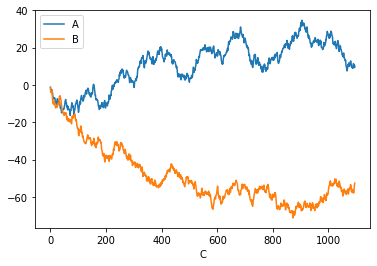

In [7]:
# создаем копию случайного блуждания
df2 = walk_df.copy()
# добавляем столбец C, который принимает значения от 0 до 1096
df2['C'] = pd.Series(np.arange(0, len(df2)), index=df2.index)
# в качестве меток оси X вместо дат используем значения столбца 'C', получаем метки оси x в диапазоне от 0 до 1000
df2.plot(x='C', y=['A', 'B']);

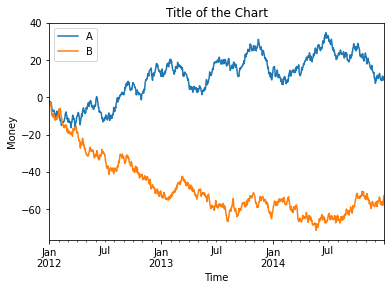

In [8]:
# создаем график временного ряда с заголовком и заданными  подписями осей x и y

# заголовок задаем с помощью параметра title метода .plot()
walk_df.plot(title='Title of the Chart')
# после вызова метода .plot() явно
# задаем подписи осей x и y
plt.xlabel('Time')
plt.ylabel('Money');

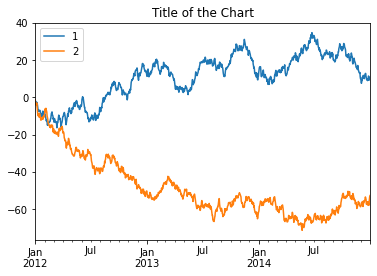

In [9]:
# изменяем элементы легенды, соответствующие именам столбцов датафрейма
ax = walk_df.plot(title='Title of the Chart')
# эта строка задает метки легенды
ax.legend(['1', '2']);

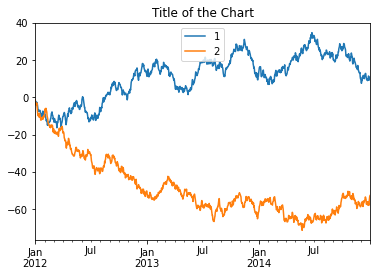

In [10]:
# изменяем расположение легенды
ax = walk_df.plot(title='Title of the Chart')
# применяем к легенде вертикальное выравнивание сверху с горизонтальным выравниванием по центру
ax.legend(['1', '2'], loc='upper center');

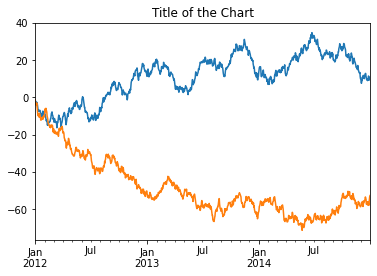

In [11]:
# отключаем легенду с помощью legend=False
walk_df.plot(title='Title of the Chart', legend=False);

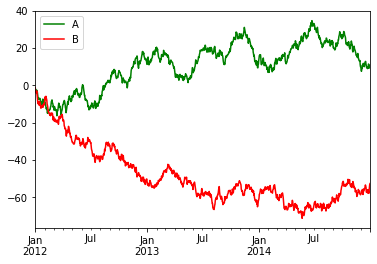

In [12]:
# меняем цвета линий графика, используя символьный
# код для первой линии и шестнадцатеричный
# RGB-код для второй
walk_df.plot(style=['g', '#FF0000']);

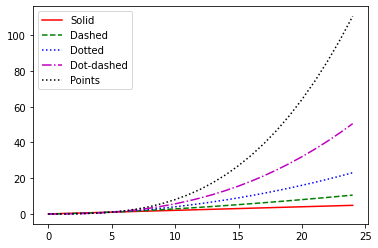

In [13]:
# демонстрируем различные стили линий
t = np.arange(0., 5., 0.2)
legend_labels = ['Solid', 'Dashed', 'Dotted', 
                 'Dot-dashed', 'Points']
line_style = pd.DataFrame({0 : t,
                           1 : t**1.5,
                           2 : t**2.0,
                           3 : t**2.5,
                           4 : t**3.0})
# создаем график, задав цвет и стиль каждой линии
ax = line_style.plot(style=['r-', 'g--', 'b:', 'm-.', 'k:'])
# задаем легенду
ax.legend(legend_labels, loc='upper left');

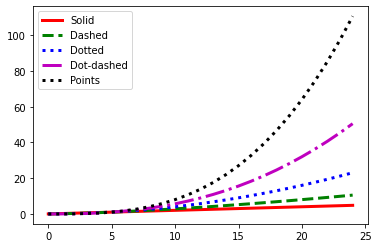

In [14]:

# заново строим график, задав стиль и цвет каждой
# линии и толщину 3 для всех линий 
ax = line_style.plot(style=['r-', 'g--', 'b:', 'm-.', 'k:'], lw=3)
ax.legend(legend_labels, loc='upper left');

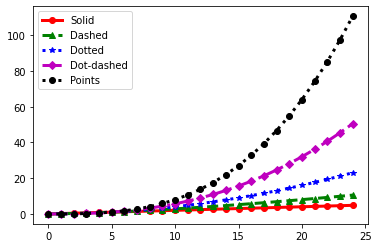

In [15]:
# рисуем заново, добавив маркеры линий
ax = line_style.plot(style=['r-o', 'g--^', 'b:*', 
                            'm-.D', 'k:o'], lw=3)
ax.legend(legend_labels, loc='upper left');

array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

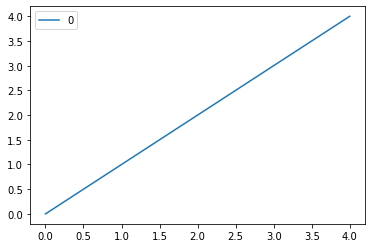

In [16]:
# строим простой график, чтобы продемонстрировать,
# как извлечь информацию о делениях шкалы
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
ticks, labels = plt.xticks()
ticks

array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

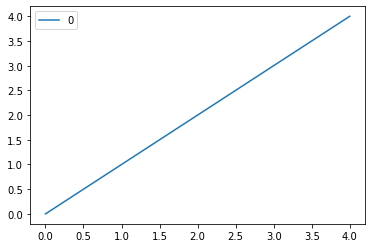

In [17]:
# строим простой график, чтобы продемонстрировать,
# как извлечь информацию о делениях шкалы
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
ticks, labels = plt.xticks()
ticks

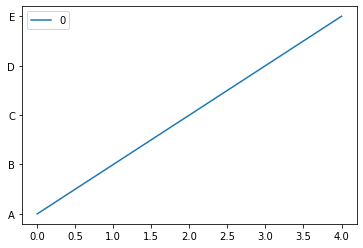

In [18]:
# переименовываем метки делений оси y
# в метки A, B, C, D и E
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
plt.yticks(np.arange(0, 5), list("ABCDE"));

Форматирование меток делений, содержащих даты, с помощью форматтеров¶


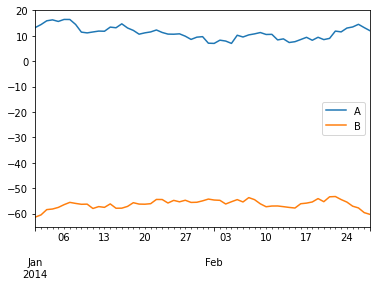

In [19]:
# визуализируем данные за январь-февраль 2014
# на основе случайного блуждания
walk_df.loc['2014-01':'2014-02'].plot();

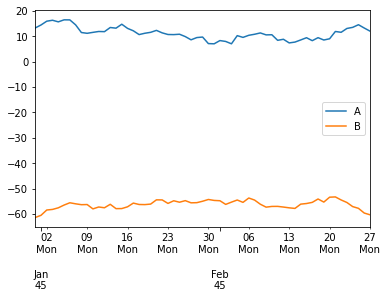

In [21]:
# импортируем необходимые локаторы и форматтеры
from matplotlib.dates import WeekdayLocator, \
DateFormatter, MonthLocator

# визуализируем данные за январь-февраль 2014
ax = walk_df.loc['2014-01':'2014-02'].plot()

# настраиваем метки промежуточных делений
weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter("%d\n%a"))

# настраиваем метки основных делений
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'))

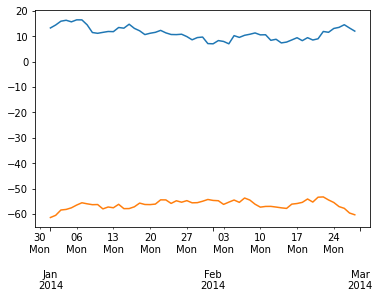

In [22]:
# создаем копию данных за январь-февраль 2014
walk_subset = walk_df['2014-01':'2014-02']

# строим график
fig, ax = plt.subplots()

# информируем matplotlib, что используем даты
# обратите внимание на то, что нам нужно преобразовать
# индекс DatetimeIndex в однородный многомерный массив Numpy,
# состоящий из объектов datetime.datetime
ax.plot_date(walk_subset.index.to_pydatetime(), walk_subset, '-')

# настраиваем метки промежуточных делений
weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter('%d\n%a'))

# настраиваем метки основных делений
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'));

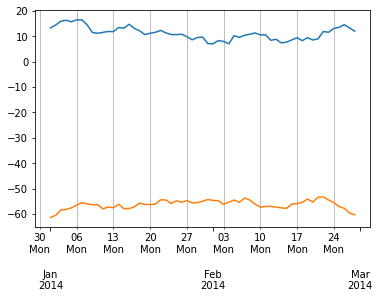

In [23]:
# строим график
fig, ax = plt.subplots()

# информируем matplotlib, что используем даты
# обратите внимание на то, что нам нужно преобразовать
# индекс DatetimeIndex в однородный многомерный массив Numpy,
# состоящий из объектов datetime.datetime
ax.plot_date(walk_subset.index.to_pydatetime(), walk_subset, '-')

# настраиваем метки промежуточных делений
weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter('%d\n%a'))
ax.xaxis.grid(True, "minor") # включаем линии сетки для промежуточных делений
ax.xaxis.grid(False, "major") # отключаем линии сетки для основных делений

# настраиваем метки основных делений
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'));

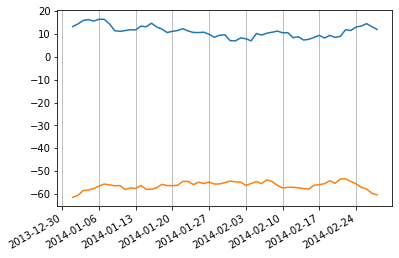

In [24]:
# строим график
fig, ax = plt.subplots()

# информируем matplotlib, что используем даты
# обратите внимание на то, что нам нужно преобразовать
# индекс DatetimeIndex в однородный многомерный массив Numpy,
# состоящий из объектов datetime.datetime
ax.plot_date(walk_subset.index.to_pydatetime(), walk_subset, '-')

ax.xaxis.grid(True, "major") # выводим линии сетки для основных делений

# настраиваем метки основных делений
ax.xaxis.set_major_locator(weekday_locator)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'));

# выполняем поворот меток с датами
fig.autofmt_xdate();

Столбиковые диаграммы¶


In [29]:
s = pd.Series([0.0, 0.1, 0.2, 0.3, 0.4],
              ['V', 'W', 'X', 'Y', 'Z'])
heatmap_data = pd.DataFrame({'A' : s + 0.0,
                             'B' : s + 0.1,
                             'C' : s + 0.2,
                             'D' : s + 0.3,
                             'E' : s + 0.4,
                             'F' : s + 0.5,
                             'G' : s + 0.6
                     })
heatmap_data

,A,B,C,D,E,F,G
V,0.0,0.1,0.2,0.3,0.4,0.5,0.6
W,0.1,0.2,0.3,0.4,0.5,0.6,0.7
X,0.2,0.3,0.4,0.5,0.6,0.7,0.8
Y,0.3,0.4,0.5,0.6,0.7,0.8,0.9
Z,0.4,0.5,0.6,0.7,0.8,0.9,1.0


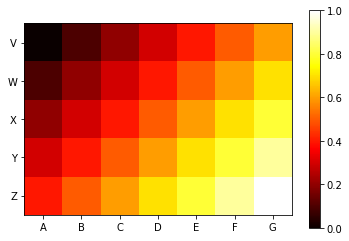

In [30]:

# строим теплокарту
plt.imshow(heatmap_data, cmap='hot', interpolation='none')
plt.colorbar()  # добавим шкалу интенсивности цвета
# задаем метки
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(range(len(heatmap_data)), heatmap_data.index);

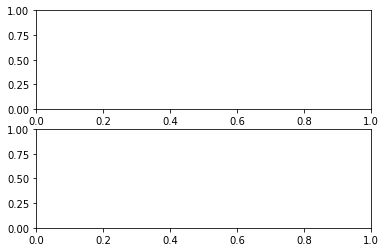

In [32]:
# создаем два подграфика на одном рисунке,
# используя сетку 2x1 (2 строки и 1 столбец)
# ax1 - верхняя строка
ax1 = plt.subplot2grid(shape=(2,1), loc=(0,0))
# и ax2 - нижняя строка
ax2 = plt.subplot2grid(shape=(2,1), loc=(1,0))

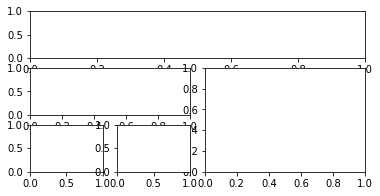

In [33]:
# создаем макет с подграфиками, используя сетку 4x4
# ax1 расположен в первой строке, шириной 4 столбца,
# все 4 столбца объединены в одну ячейку
ax1 = plt.subplot2grid((4,4), (0,0), colspan=4)
# ax2 расположен во второй строке, крайний слева и имеет 
# ширину в 2 столбца, при этом 2 столбца объединены в одну ячейку
ax2 = plt.subplot2grid((4,4), (1,0), colspan=2)
# ax3 имеет 2 столбца в ширину и 2 строки в высоту,
# при этом два столбца и две строки объединены в одну ячейку
ax3 = plt.subplot2grid((4,4), (1,2), colspan=2, rowspan=2)
# ax4 имеет 1 строку в высоту и 1 столбец в ширину, 
# расположен в строке 4 и столбце 0, 
# объединение строк и столбцов не задано
ax4 = plt.subplot2grid((4,4), (2,0))
# ax4 имеет 1 строку в высоту и 1 столбец в ширину, 
# расположен в строке 4 и столбце 1
# объединение строк и столбцов не задано
ax5 = plt.subplot2grid((4,4), (2,1));

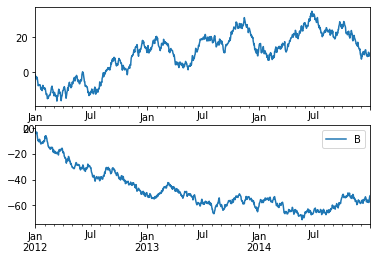

In [34]:
# демонстрируем построение подграфиков
# создаем макет, используя сетку 2x1,
# в каждой строке по одному подграфику
ax5 = plt.subplot2grid((2,1), (0,0))
ax6 = plt.subplot2grid((2,1), (1,0))
# отрисовываем первый подграфик на основе столбца 0 
# датафрейма walk_df в верхней строке сетки
walk_df[walk_df.columns[0]].plot(ax = ax5)
# отрисовываем второй подграфик на основе столбца 1 
# датафрейма walk_df в нижней строке сетки
walk_df[[walk_df.columns[1]]].plot(ax = ax6);